# Assignment 4 - Timothy Berrill

In [34]:
# import open AI gym
import gym

# import numpy
import numpy as np

# import plotting tool
import matplotlib.pyplot as plt

In [35]:
# make a new environment for the car - mountain problem and reset it so its ready to use
my_environemnt = gym.make('MountainCar-v0')

In [36]:
def show_env_properties(my_env):
  """ helper function to print out environment details """
  print(f'State space: {my_env.observation_space}')
  print(f'Action sapace: {my_env.action_space}')

In [37]:
def _helper_get_num_states(env):
  num_states = env.observation_space.high - env.observation_space.low
  num_states *= np.array([10, 100])
  num_states = np.round(num_states, 0).astype(int) + 1
  return num_states

In [38]:
def run_q_learning(env, learning, discount, epsilon, min_eps, episodes):
  # tracking variables used in function
  rewards: list = []
  avg_rewards: list = []

  # get the number of states in the environment 
  num_states = _helper_get_num_states(env)

  # initialize q table to use in learning
  q_table = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

  # calculate reduction amount which is used to reduce epsilon
  reduction = (epsilon - min_eps) / episodes

  # actual loop for q learning
  for episode in range(episodes):

    # episode initialization variables
    done_flag: bool = False
    total_reward: int = 0
    reward: int = 0

    # environment initialization
    state = env.reset()
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)

    # run the episode
    while not done_flag:

      # render the environment
      # if episode >= (episodes - 20): env.render()

      # decide on the agent's next action
      if np.random.random() < 1 - epsilon:
        # decide the action based on the q table
        action = np.argmax(q_table[state_adj[0], state_adj[1]])
      else:
        # decide the action randomly 
        action = np.random.randint(0, env.action_space.n)

      # run a step in the environment and calculate reward info
      n_state, reward, done_flag, info = env.step(action)

      # perform state discritization on the new state
      n_state_adj = (n_state - env.observation_space.low) * np.array([10, 100])
      n_state_adj = np.round(n_state_adj, 0).astype(int)

      # terminal states
      if done_flag and n_state[0] >= 0.5:
        q_table[state_adj[0], state_adj[1], action] = reward

      # adjust q value for current state
      else:
        delta = np.max(q_table[n_state_adj[0], n_state_adj[1]])
        delta = delta - q_table[state_adj[0], state_adj[1], action]
        delta = learning * (reward + discount * delta)
        q_table[state_adj[0], state_adj[1], action] += delta

      # update tracking variables
      total_reward += reward
      state_adj = n_state_adj

    # decay the epsilon value
    if epsilon > min_eps:
      epsilon -= reduction

    # track rewards
    rewards.append(total_reward)

    if (episode) % 100 == 0:
      
      # print out useful info
      print(f'Episode {episode} average reward: {np.mean(rewards)}')
      
      # store some metrics
      avg_rewards.append(np.mean(rewards))
      rewards = []

  env.close()
  return avg_rewards

In [39]:
# run q learning function defined above
rewards = run_q_learning(
    env = my_environemnt,
    learning = 0.2,
    discount = 0.9,
    epsilon = 0.8,
    min_eps = 0,
    episodes = 5000
)

Episode 0 average reward: -200.0
Episode 100 average reward: -200.0
Episode 200 average reward: -200.0
Episode 300 average reward: -200.0
Episode 400 average reward: -200.0
Episode 500 average reward: -200.0
Episode 600 average reward: -200.0
Episode 700 average reward: -200.0
Episode 800 average reward: -200.0
Episode 900 average reward: -200.0
Episode 1000 average reward: -200.0
Episode 1100 average reward: -200.0
Episode 1200 average reward: -200.0
Episode 1300 average reward: -200.0
Episode 1400 average reward: -200.0
Episode 1500 average reward: -200.0
Episode 1600 average reward: -200.0
Episode 1700 average reward: -200.0
Episode 1800 average reward: -200.0
Episode 1900 average reward: -200.0
Episode 2000 average reward: -200.0
Episode 2100 average reward: -200.0
Episode 2200 average reward: -200.0
Episode 2300 average reward: -200.0
Episode 2400 average reward: -200.0
Episode 2500 average reward: -199.91
Episode 2600 average reward: -199.64
Episode 2700 average reward: -199.67
E

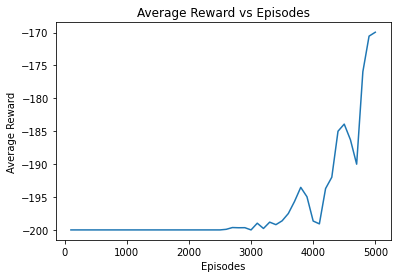

In [44]:
# Plot Rewards
# Spoiler: it works!
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
plt.close() 